## Load Data

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [164]:
df = pd.read_csv('../dataset/flight.csv') #disesuaikan denagn path pada masing-masing
df.shape

(62988, 23)

In [165]:
df.sample(5)

MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER  \
29304      60529    7/7/2012          7/7/2012    Male         5   
7903       16669  11/13/2009        11/13/2009    Male         4   
21510      17860   1/28/2008        11/13/2011    Male         4   
4763        3797   1/17/2011         1/17/2011  Female         4   
33112      46987   1/12/2013         2/16/2013    Male         4   

          WORK_CITY WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  FLIGHT_COUNT  \
29304        dalian      liaoning           CN  51.0  3/31/2014            10   
7903       shenyang      liaoning           CN  54.0  3/31/2014            29   
21510  Eunpyeong-gu         Seoul           KR  54.0  3/31/2014            17   
4763     PHNOM PENH           NaN           KH  46.0  3/31/2014            32   
33112     guangzhou     guangdong           CN  31.0  3/31/2014             6   

       BP_SUM  SUM_YR_1  SUM_YR_2  SEG_KM_SUM LAST_FLIGHT_DATE  LAST_TO_END  \
29304    6779    8204.0    1001.0        7461       11/21/2013          132   
7903    21004   12861.0   10427.0       36686        3/30/2014            2   
21510    9064   11356.0    4515.0       13251         1/4/2014           88   
4763    19782   20050.0   14700.0       56762        3/24/2014            8   
33112    4527    2080.0    3916.0        8851        3/27/2014            5   

       AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT  avg_discount  Points_Sum  \
29304     55.777778           242               0      1.037125        6779   
7903      25.785714           127               1      0.702276       21004   
21510     38.625000           240               0      0.855937        9064   
4763      21.548387            74               1      0.617334       19782   
33112     81.000000           234               0      0.730155        4527   

       Point_NotFlight  
29304                0  
7903                 1  
21510                0  
4763                 1  
33112                0

## Nomor 1

### Bagian A

#### Pengecekan Tipe Data

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

Terdapat ketidaksesuaian tipe data date yang ternyata adalah tipe data object diantaranya adalah:
1. FFP_DATE
2. FIRST_FLIGHT_DATE
3. LAST_FLIGHT_DATE
4. LOAD_TIME

Terhadap tipe data yang tidak sesuai maka perlu dilakukan penyesuian yaitu dengan merubah tipe data object menjadi date, seperti pada dibawah ini:

In [167]:
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'],  errors='coerce')
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'], errors='coerce')
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'],  errors='coerce')
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'], errors='coerce')

#### Pengecekan Data Kosong

In [168]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE      421
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

Terdapat banyak data yang kosong diantaranya ada pada kolom:
1. WORK_CITY     =        2269
2. WORK_PROVINCE =        3248
3. WORK_COUNTRY  =        26
4. AGE           =        420
5. SUM_YR_1      =        551
6. SUM_YR_2      =        138

Untuk data kosong ini dapat didrop pada feature engineering.

In [169]:
df['WORK_CITY'].fillna(df['WORK_CITY'].mode()[0], inplace=True)
df['WORK_PROVINCE'].fillna(df['WORK_PROVINCE'].mode()[0], inplace=True)
df['WORK_COUNTRY'].fillna(df['WORK_COUNTRY'].mode()[0], inplace=True)
df['GENDER'].fillna(df['GENDER'].mode()[0], inplace=True)

In [170]:
# imputasi kolom numerikal dengan nilai rata-rata
df['AGE'].fillna(df['AGE'].median(), inplace=True)
df['SUM_YR_1'].fillna(df['SUM_YR_1'].median(), inplace=True)
df['SUM_YR_2'].fillna(df['SUM_YR_2'].median(), inplace=True)

Pada tahap EDA ini kami buat data terisi dahulu dangan nilai rata-ratanya agar dapat diolah ditahap selanjutnya.

In [171]:
df = df.dropna()
df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

#### Pengecekan Data Duplikat

In [172]:
df.duplicated(subset='MEMBER_NO').sum()

0

Dapat dilihat, tidak terdapat data duplikat

### Bagian B

#### Melihat Statistik Descriptive Kolom

In [173]:
cats = ["GENDER", "WORK_CITY", "WORK_PROVINCE", "WORK_COUNTRY"]
nums = ["FFP_TIER", "AGE", "FLIGHT_COUNT", "BP_SUM", "SUM_YR_1", "SUM_YR_2", "SEG_KM_SUM", "LAST_TO_END",
        "AVG_INTERVAL", "MAX_INTERVAL", "EXCHANGE_COUNT", "avg_discount", "Points_Sum", "Point_NotFlight"]
date = ["FFP_DATE", "FIRST_FLIGHT_DATE", "LAST_FLIGHT_DATE", "LOAD_TIME"]

In [174]:
df[cats].describe()

GENDER  WORK_CITY WORK_PROVINCE WORK_COUNTRY
count   62567      62567         62567        62567
unique      2       3225          1161          118
top      Male  guangzhou     guangdong           CN
freq    47809      11581         20621        57372

In [175]:
df[nums].describe()

FFP_TIER           AGE  FLIGHT_COUNT         BP_SUM       SUM_YR_1  \
count  62567.000000  62567.000000  62567.000000   62567.000000   62567.000000   
mean       4.101971     42.471383     11.814391   10906.691786    5329.850613   
std        0.373871      9.854107     14.051878   16351.867568    8084.527745   
min        4.000000      6.000000      2.000000       0.000000       0.000000   
25%        4.000000     35.000000      3.000000    2509.000000    1020.000000   
50%        4.000000     41.000000      7.000000    5681.000000    2800.000000   
75%        4.000000     48.000000     15.000000   12797.000000    6513.500000   
max        6.000000    110.000000    213.000000  505308.000000  239560.000000   

            SUM_YR_2     SEG_KM_SUM   LAST_TO_END  AVG_INTERVAL  MAX_INTERVAL  \
count   62567.000000   62567.000000  62567.000000  62567.000000  62567.000000   
mean     5582.617514   17095.441159    177.089856     67.774899    165.886969   
std      8699.187258   20974.464921    184.057816     77.606573    123.393978   
min         0.000000     368.000000      1.000000      0.000000      0.000000   
25%       773.000000    4732.000000     29.000000     23.333333     79.000000   
50%      2768.000000    9959.000000    109.000000     44.642857    143.000000   
75%      6801.500000   21206.000000    269.000000     82.000000    227.000000   
max    234188.000000  580717.000000    731.000000    728.000000    728.000000   

       EXCHANGE_COUNT  avg_discount     Points_Sum  Point_NotFlight  
count    62567.000000  62567.000000   62567.000000     62567.000000  
mean         0.319306      0.721555   12524.515959         2.726533  
std          1.137151      0.185485   20524.415318         7.360838  
min          0.000000      0.000000       0.000000         0.000000  
25%          0.000000      0.611875    2764.000000         0.000000  
50%          0.000000      0.711826    6303.000000         0.000000  
75%          0.000000      0.809611   14249.000000         1.000000  
max         46.000000      1.500000  985572.000000       140.000000

In [176]:
df[date].describe()

FFP_DATE              FIRST_FLIGHT_DATE  \
count                          62567                          62567   
mean   2010-03-07 14:43:36.267361280  2010-09-02 05:07:37.372097280   
min              2004-11-01 00:00:00            1905-12-31 00:00:00   
25%              2008-04-13 00:00:00            2008-12-15 00:00:00   
50%              2010-10-10 00:00:00            2011-04-24 00:00:00   
75%              2012-03-29 00:00:00            2012-07-26 00:00:00   
max              2013-03-31 00:00:00            2015-05-30 00:00:00   

                    LAST_FLIGHT_DATE            LOAD_TIME  
count                          62567                62567  
mean   2013-10-06 15:32:03.103233280  2014-03-31 00:00:00  
min              2012-04-01 00:00:00  2014-03-31 00:00:00  
25%              2013-07-07 00:00:00  2014-03-31 00:00:00  
50%              2013-12-14 00:00:00  2014-03-31 00:00:00  
75%              2014-03-03 00:00:00  2014-03-31 00:00:00  
max              2014-03-31 00:00:00  2014-03-31 00:00:00

#### Melihat Distribusi Kolom Numerik

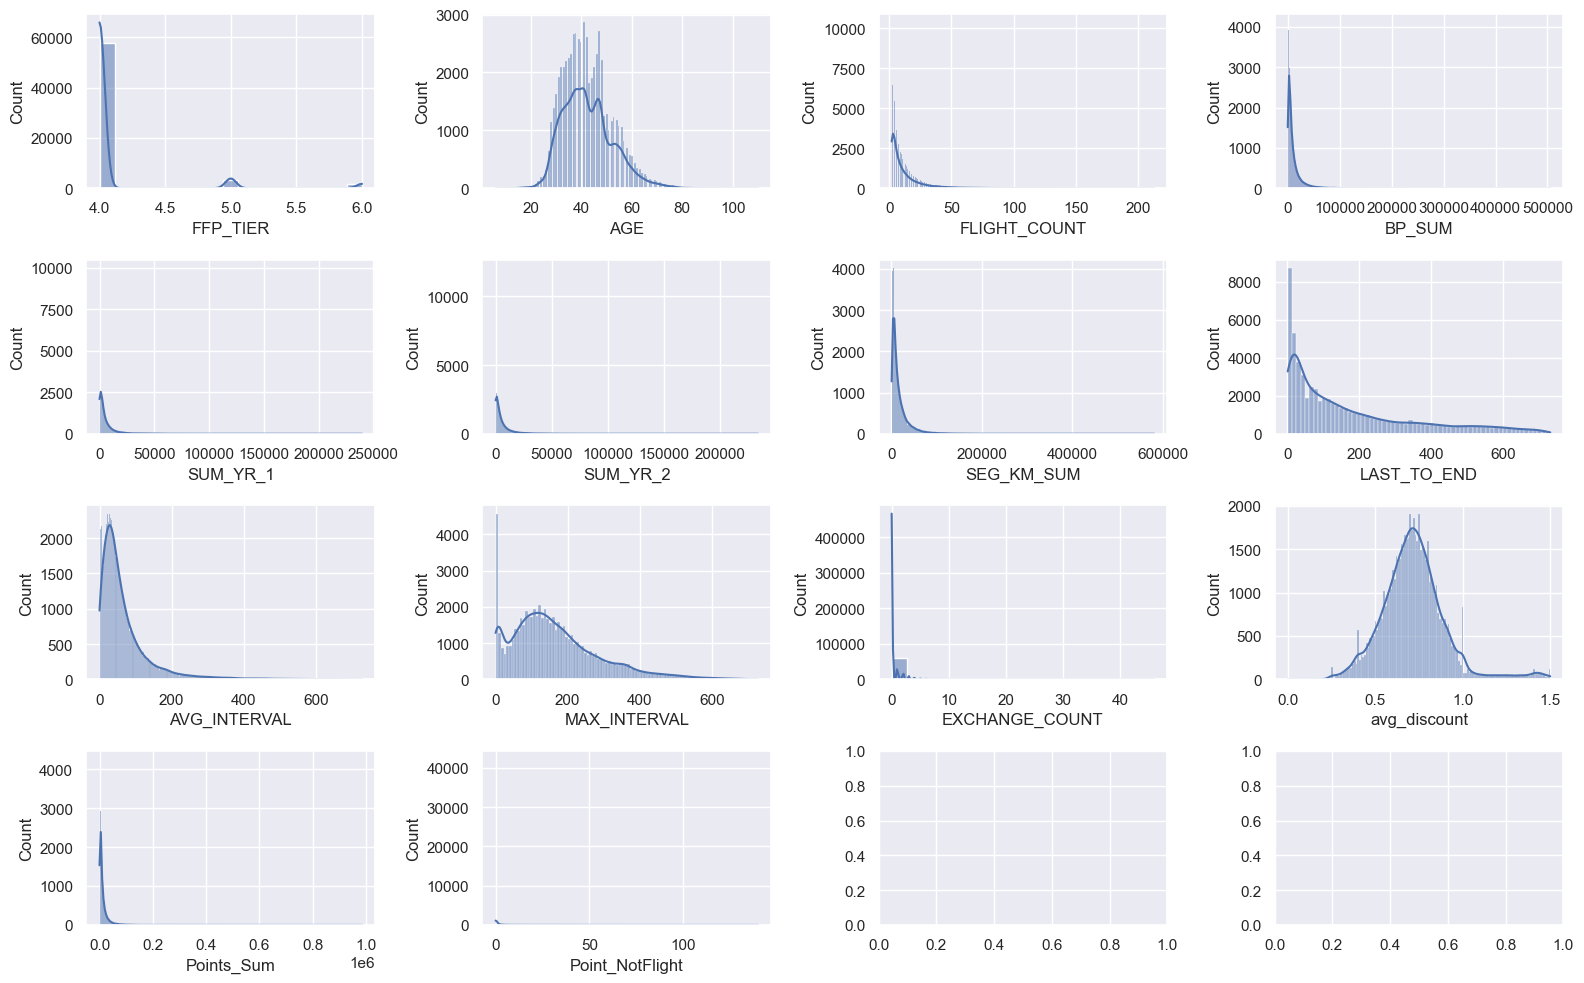

In [177]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 10))
axs = axs.flatten()

for i, var in enumerate(nums):
    sns.histplot(x=var, data=df, kde=True, ax=axs[i])

fig.tight_layout()

plt.show()

Penjelasan distribusi:
1. FFP_TIER: Nilai pada kolom ini hanya berada pada 4,5 dan 6. Untuk distribusi terbanyak berada pada nilai 4.
2. AGE: Nilai distibusi pada kolom ini hampir berbentuk normal, sebaran terbanyak berada pada umur sekitar 40 tahun.
3. AVG_DISCOUNT: Memiliki distribusi normal.
4. MAX_Interval: Memiliki bentuk distribusi yang hampir mendekati dengan positively skew
5. EXCHANGE_COUNT: nilainya terpusat pada nilai yang kecil yaitu 0 sampai 5.

Untuk kolom Flight_count, BP_sum, SUM_YR_1, SUM_YR_2, SEG_KM_SUM, LAST_TO_END, AVG_Interval dan POINTS_SUM memiliki bentuk pesebaran postively skew.

#### Melihat Distribusi Kolom Kategorikal

##### Gender

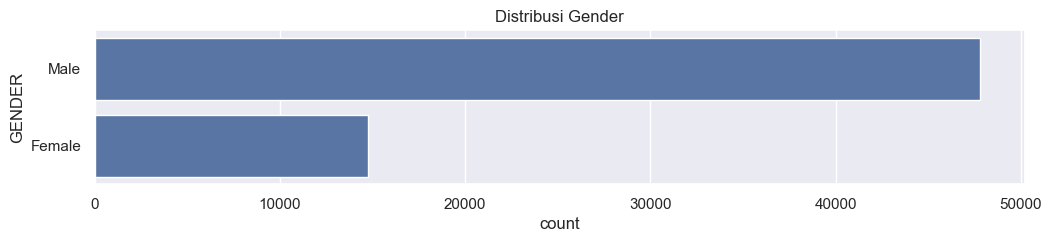

In [178]:
plt.figure(figsize=(12, 2))
sns.countplot(data=df, y='GENDER', order=df['GENDER'].value_counts().index)
plt.title('Distribusi Gender')
plt.show()

##### Kategorikal Top 20

Kolom kategorikal "WORK_CITY", "WORK_PROVINCE", dan "WORK_COUNTRY" memiliki jumlah unique value yang cukup banyak, maka dari hanya akan ditampilkan top 20 teratas saja

In [179]:
def plot_categorical(cat_column):
    top_n_values = df[cat_column].value_counts().nlargest(20).index
    
    # Membuat dataframe yang berisi hanya data dengan top 20 nilai unik
    df_filtered = df[df[cat_column].isin(top_n_values)]

    # Visualisasi data kategorikal yang telah difilter
    plt.figure(figsize=(15, 4))
    sns.countplot(data=df_filtered, x=cat_column)
    plt.title(f'Distribusi {cat_column} (Top 20)')
    plt.xticks(rotation=45)
    plt.show()

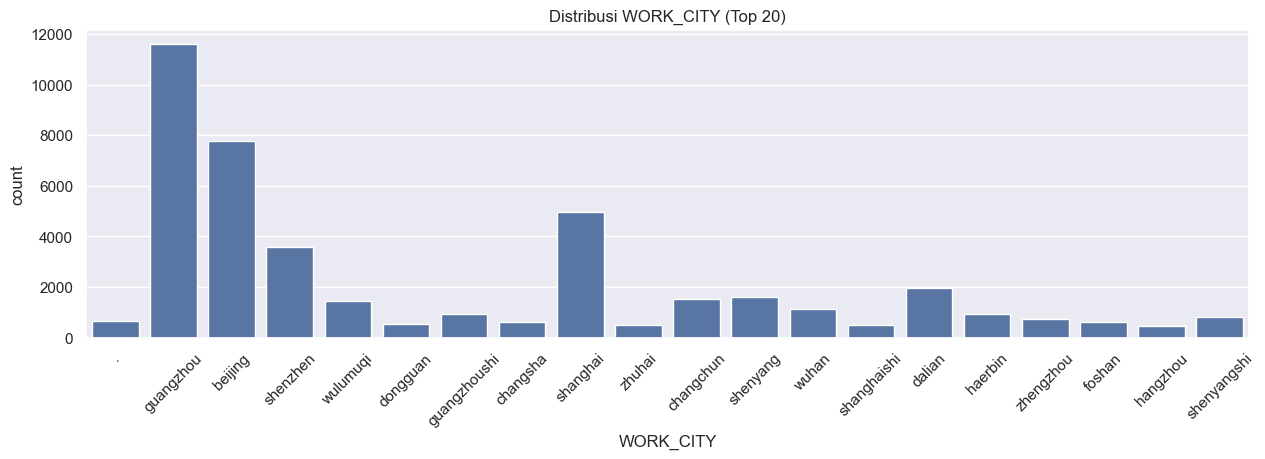

In [180]:
plot_categorical("WORK_CITY")

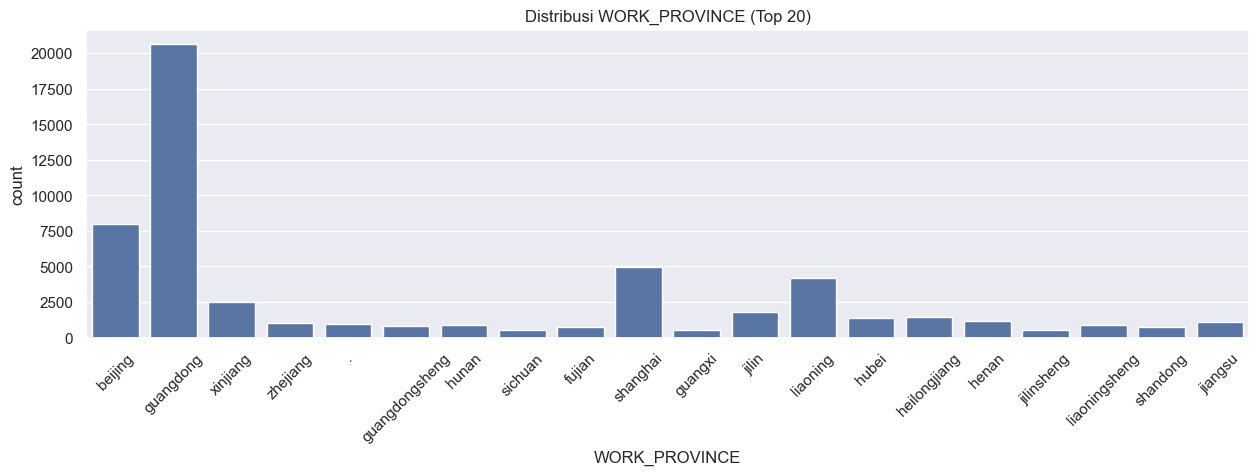

In [181]:
plot_categorical("WORK_PROVINCE")

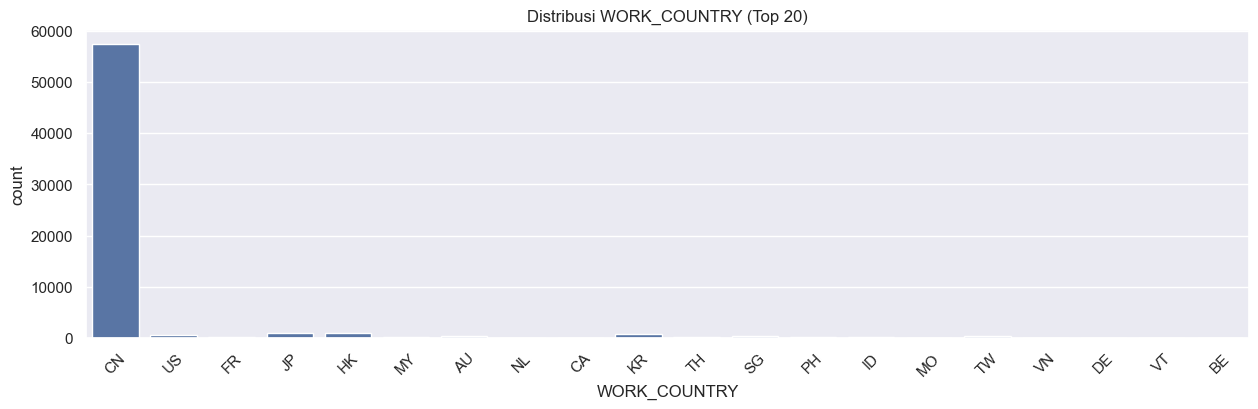

In [182]:
plot_categorical("WORK_COUNTRY")

#### Melihat Distribusi Kolom Datetime

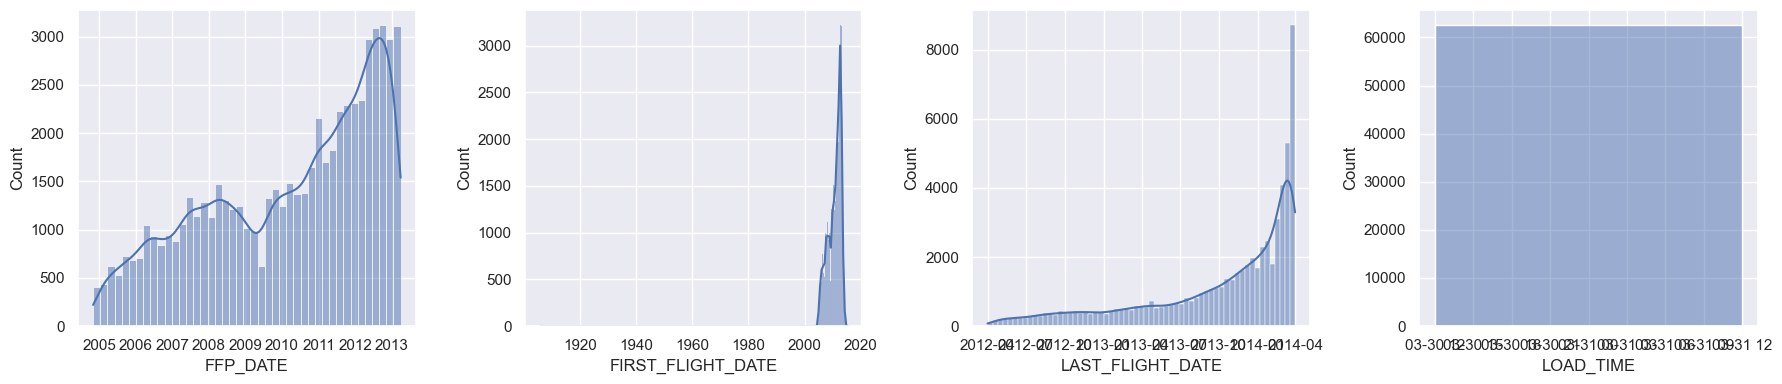

In [183]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(18, 4))
axs = axs.flatten()

for i, var in enumerate(date):
    sns.histplot(x=var, data=df, kde=True, ax=axs[i])

fig.tight_layout()

plt.show()

Dapat terlihat dari grafik diatas bahwa terjadi kenaikan trend setiap tahunnya. Adapun nilai distribusi dari LOAD_TIME semuanya sama maka dapat dipertimbangkan untuk didrop.

### Bagian C

#### Analisa Multivariate

<Axes: >

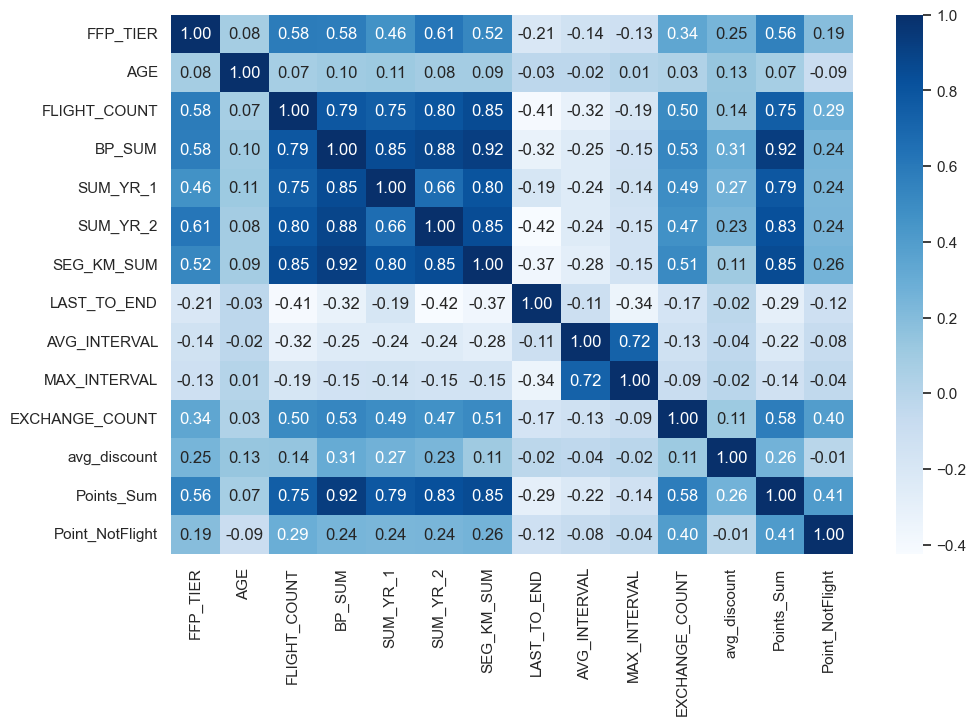

In [184]:
plt.figure(figsize=(11, 7))
sns.heatmap(df[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

Terdapat beberapa fitur yang memiliki korelasi yang besar, maka untuk fitur-fitur yang memiliki nilai korelasi lebih dari 0.85 untuk bisa langsung dieliminasi salah satunya sehingga didapatkan 1 fitur yang tidak redundant. Diantaranya adalah:
1. BP_SUM dan Points_SUM = 0.92
2. BP_SUM dan SUM_YR_2 = 0.88
3. BP_SUM dan SEG_KM_SUM = 0.92

## Nomor 2 

### Bagian B

#### Preprocessing

##### Menghapus Outlier Pada Kolom Numerik

In [185]:
def remove_outliers_iqr(dataframe, column_name):
    # Calculate the IQR
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to exclude outliers
    filtered_dataframe = dataframe[(dataframe[column_name] >= lower_bound) & (
        dataframe[column_name] <= upper_bound)]

    return filtered_dataframe

In [186]:
print("Original DataFrame Shape:", df.shape)

df_filtered = df.copy()
for i in range(0, len(nums)):
    df_filtered = remove_outliers_iqr(df_filtered, nums[i])

print("Filtered DataFrame Shape:", df_filtered.shape)

Original DataFrame Shape: (62567, 23)
Filtered DataFrame Shape: (30640, 23)


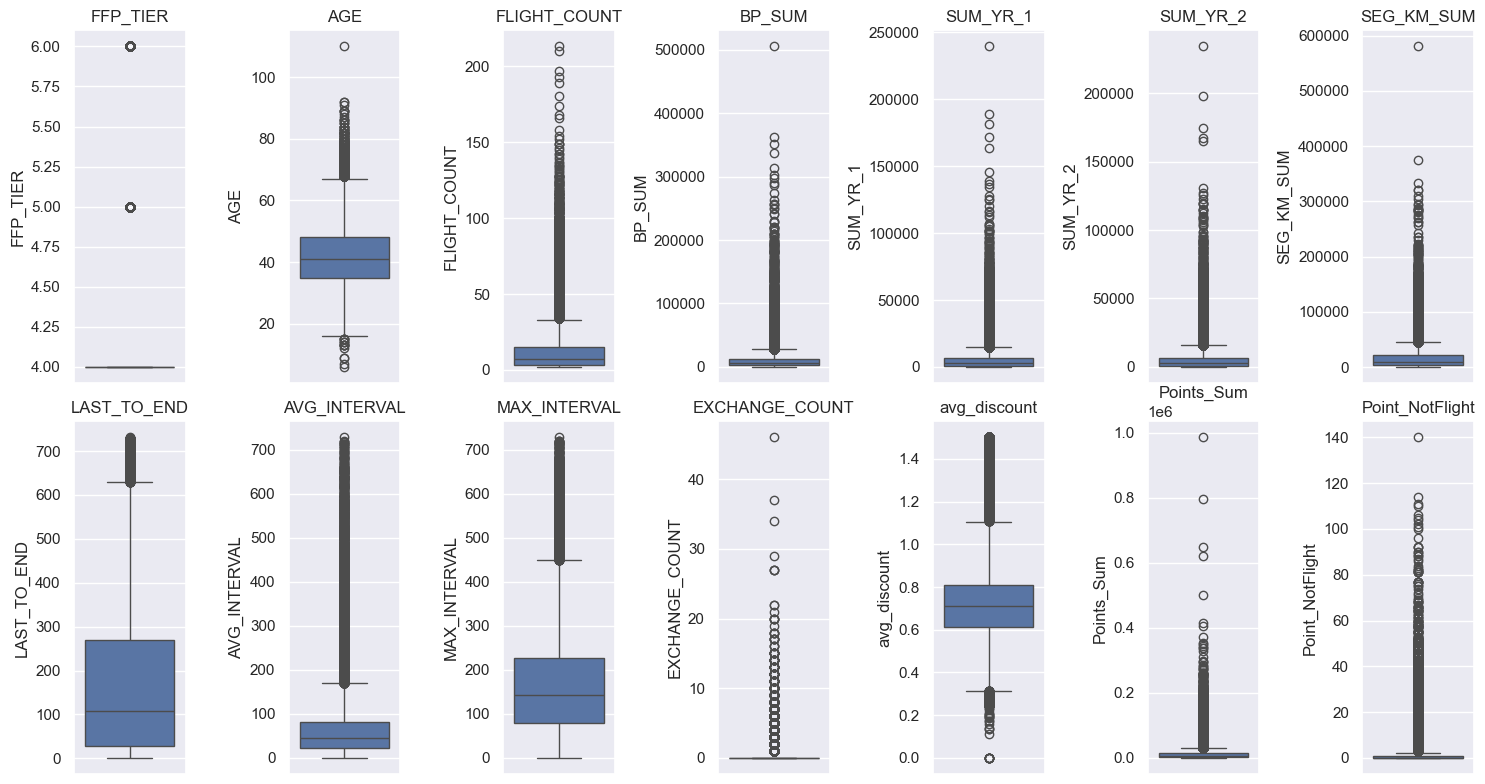

In [187]:
plt.figure(figsize=(15, 8))

for i in range(len(nums)):
    plt.subplot(2, len(nums)//2, i+1) 
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.title(nums[i])

plt.tight_layout()
plt.show()

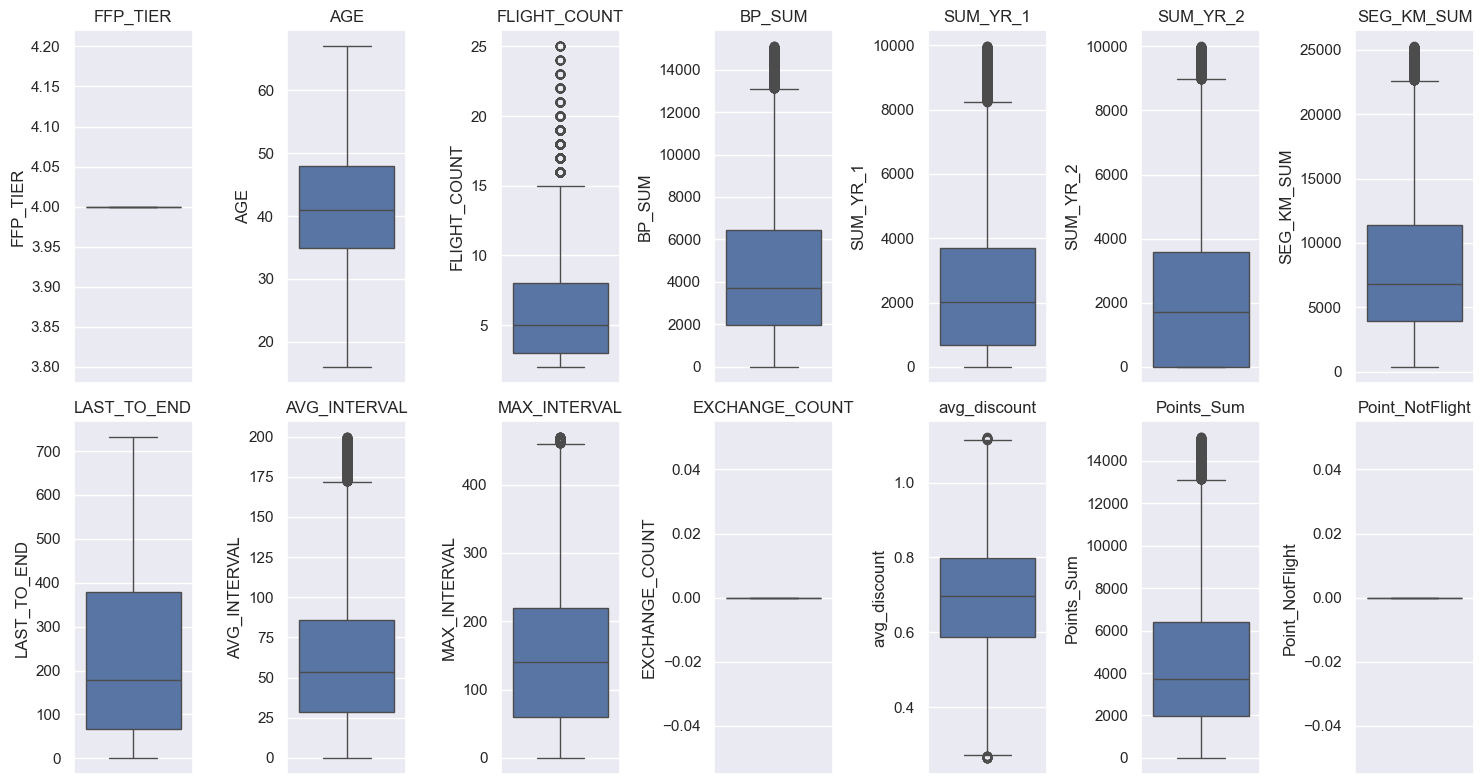

In [188]:
plt.figure(figsize=(15, 8))

for i in range(len(nums)):
    plt.subplot(2, len(nums)//2, i+1)
    sns.boxplot(y=df_filtered[nums[i]], orient='v')
    plt.title(nums[i])

plt.tight_layout()
plt.show()

#### Feature Engineering

##### Feature Encoding

Feature encoding akan dilakukan pada fitur kategorikal yaitu fitur 'Gender'agar fitur dapat direpresentasikan sebagai fitur numerik

In [189]:
# Membuat mapping dari kategori ke nilai numerik
gender_mapping = {'Male': 0, 'Female': 1}
df_filtered['GENDER'] = df_filtered['GENDER'].map(gender_mapping)

##### Recency

Kapan terakhir kali customer melakukan penerbangan (Dalam jumlah hari)

In [190]:
df_filtered['recency'] = (df_filtered['LOAD_TIME'] - df_filtered['LAST_FLIGHT_DATE']).dt.days

In [191]:
df_filtered['recency'].value_counts().reset_index()

recency  count
0          3    213
1          0    199
2          4    198
3          1    194
4         11    188
..       ...    ...
725      724      3
726      728      2
727      454      1
728      729      1
729      726      1

[730 rows x 2 columns]

##### Frequency

Frequency dapat dilihat dari kolom FLIGHT_COUNT

##### Monetary

In [192]:
df_filtered['monetary'] = df_filtered['SUM_YR_1'] + df_filtered['SUM_YR_2']

In [193]:
df_filtered['monetary'].value_counts().reset_index()

monetary  count
0        2800.0    477
1           0.0    142
2        2773.0    114
3        1400.0     37
4        1920.0     35
...         ...    ...
10303    7764.0      1
10304    9224.0      1
10305    8496.0      1
10306    9028.0      1
10307     370.0      1

[10308 rows x 2 columns]

##### Binning

In [194]:
# Menggunakan pd.qcut untuk membuat bins pada kolom 'AGE'
df_filtered['age_bin'] = pd.qcut(df_filtered['AGE'], q=5, labels=False)

# Menggunakan pd.qcut untuk membuat bins pada kolom 'avg_discount'
df_filtered['avg_discount_level'] = pd.qcut(df_filtered['avg_discount'], q=5, labels=False)

# Membuat bins untuk mengelompokan jumlah poin 
df_filtered['Points_Sum_level'] = pd.qcut(df_filtered['Points_Sum'], q=5, labels=False)

# Membuat bins untuk mengelompokan jumlah penukaran poin 
df_filtered['exchange_count_bin'] = pd.cut(df_filtered['EXCHANGE_COUNT'], bins=4, labels=False)

##### Average Distance

In [195]:
df_filtered['AVG_DISTANCE'] = df_filtered['SEG_KM_SUM'] / df_filtered['FLIGHT_COUNT']

In [196]:
df_filtered.shape

(30640, 30)

In [197]:
df_filtered.head()

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER   WORK_CITY  \
11738      46939 2012-11-28        2013-01-12       0         4     haerbin   
11817      10985 2004-12-02        2005-02-08       0         4  beijingshi   
12003      35368 2011-08-21        2011-08-21       0         4    shaoxing   
12164       7025 2012-12-02        2012-12-02       0         4   guangzhou   
12169       1112 2007-03-14        2007-08-03       0         4    tongzhou   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  FLIGHT_COUNT  BP_SUM  \
11738  heilongjiang           CN  38.0 2014-03-31            13   15079   
11817     guangdong           CN  58.0 2014-03-31             4   11375   
12003      zhejiang           CN  43.0 2014-03-31            13   13765   
12164     guangdong           CN  34.0 2014-03-31            14   14974   
12169       jiangsu           CN  38.0 2014-03-31            17   14924   

       SUM_YR_1  SUM_YR_2  SEG_KM_SUM LAST_FLIGHT_DATE  LAST_TO_END  \
11738    9264.0    8458.0       25075       2014-03-05           27   
11817    7900.0       0.0       23723       2012-11-29          489   
12003    9363.0    6512.0       22522       2014-01-05           87   
12164    7875.0    8055.0       24785       2013-12-17          106   
12169    6840.0    9902.0       23116       2014-01-23           69   

       AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT  avg_discount  Points_Sum  \
11738     34.833333           216               0      0.775179       15079   
11817     80.333333           196               0      0.815327       11375   
12003     51.583333           244               0      0.848179       13765   
12164     29.230769           129               0      0.763035       14974   
12169     36.437500           115               0      0.817760       14924   

       Point_NotFlight  recency  monetary  age_bin  avg_discount_level  \
11738                0       26   17722.0        1                   3   
11817                0      487    7900.0        4                   3   
12003                0       85   15875.0        2                   4   
12164                0      104   15930.0        1                   3   
12169                0       67   16742.0        1                   3   

       Points_Sum_level  exchange_count_bin  AVG_DISTANCE  
11738                 4                   1   1928.846154  
11817                 4                   1   5930.750000  
12003                 4                   1   1732.461538  
12164                 4                   1   1770.357143  
12169                 4                   1   1359.764706

#### Log Transformation

In [198]:
print(nums)

['FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']


C:\Users\asus\AppData\Local\Temp\ipykernel_8772\1137906114.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_filtered[nums[i]])


C:\Users\asus\AppData\Local\Temp\ipykernel_8772\1137906114.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_filtered[nums[i]])
C:\Users\asus\AppData\Local\Temp\ipykernel_8772\1137906114.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_filtered[nums[i]])


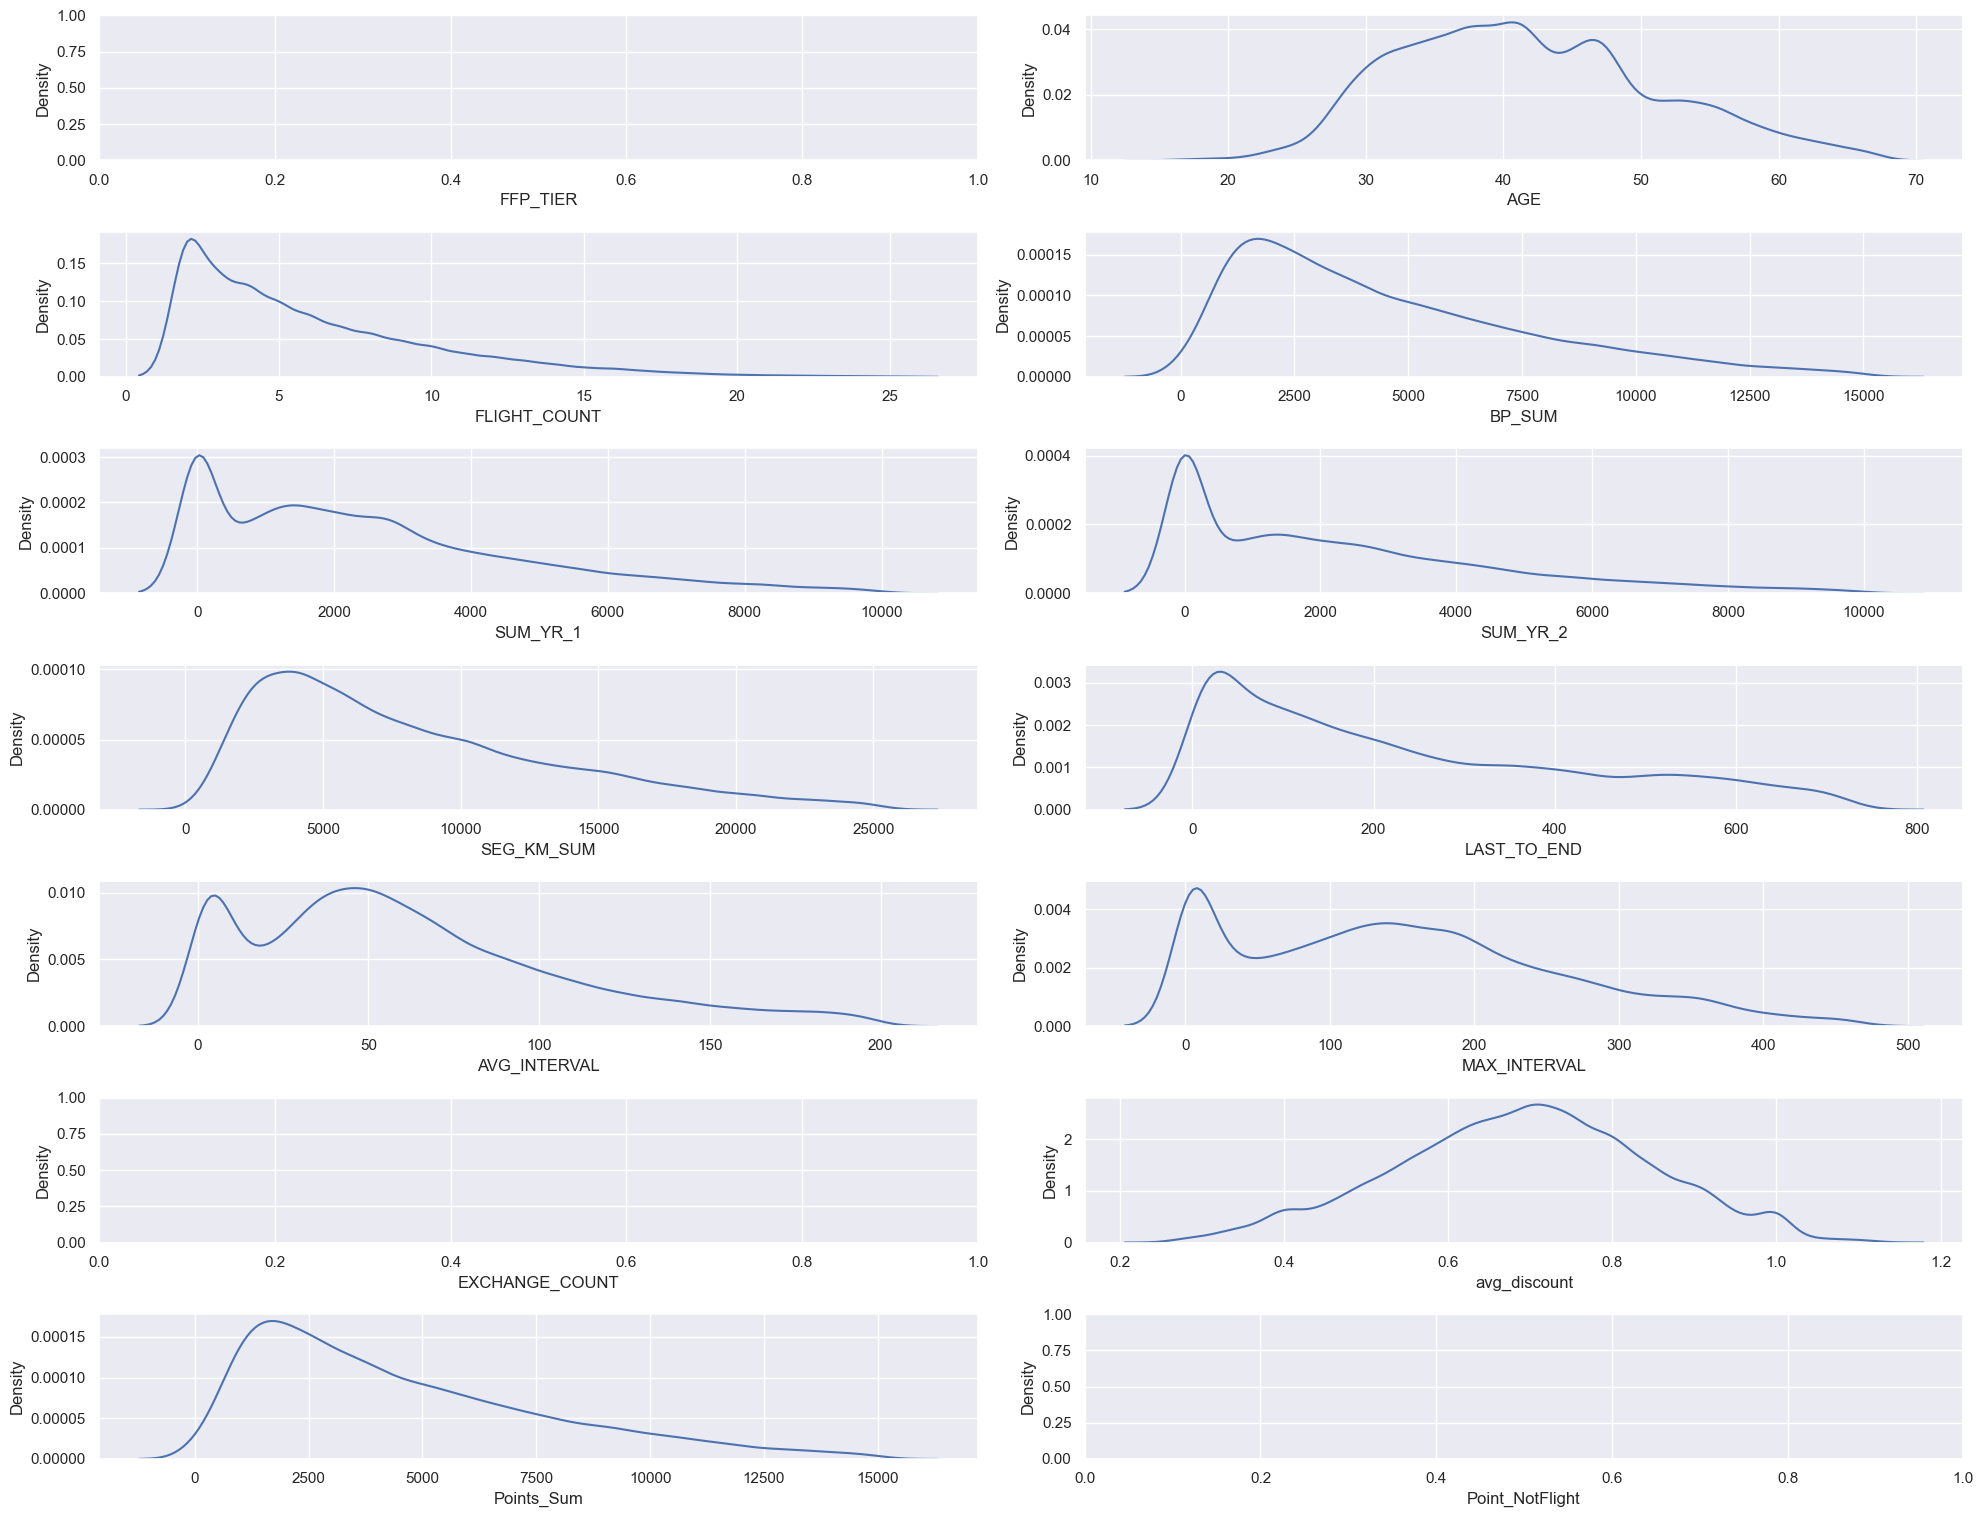

In [199]:
plt.figure(figsize=(20, 30))
for i in range(0, len(nums)):
    plt.subplot(len(nums), 2, i+1)
    sns.kdeplot(df_filtered[nums[i]])
    plt.tight_layout()

C:\Users\asus\AppData\Local\Temp\ipykernel_8772\512284426.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_filtered[nums[i]])
C:\Users\asus\AppData\Local\Temp\ipykernel_8772\512284426.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_filtered[nums[i]])


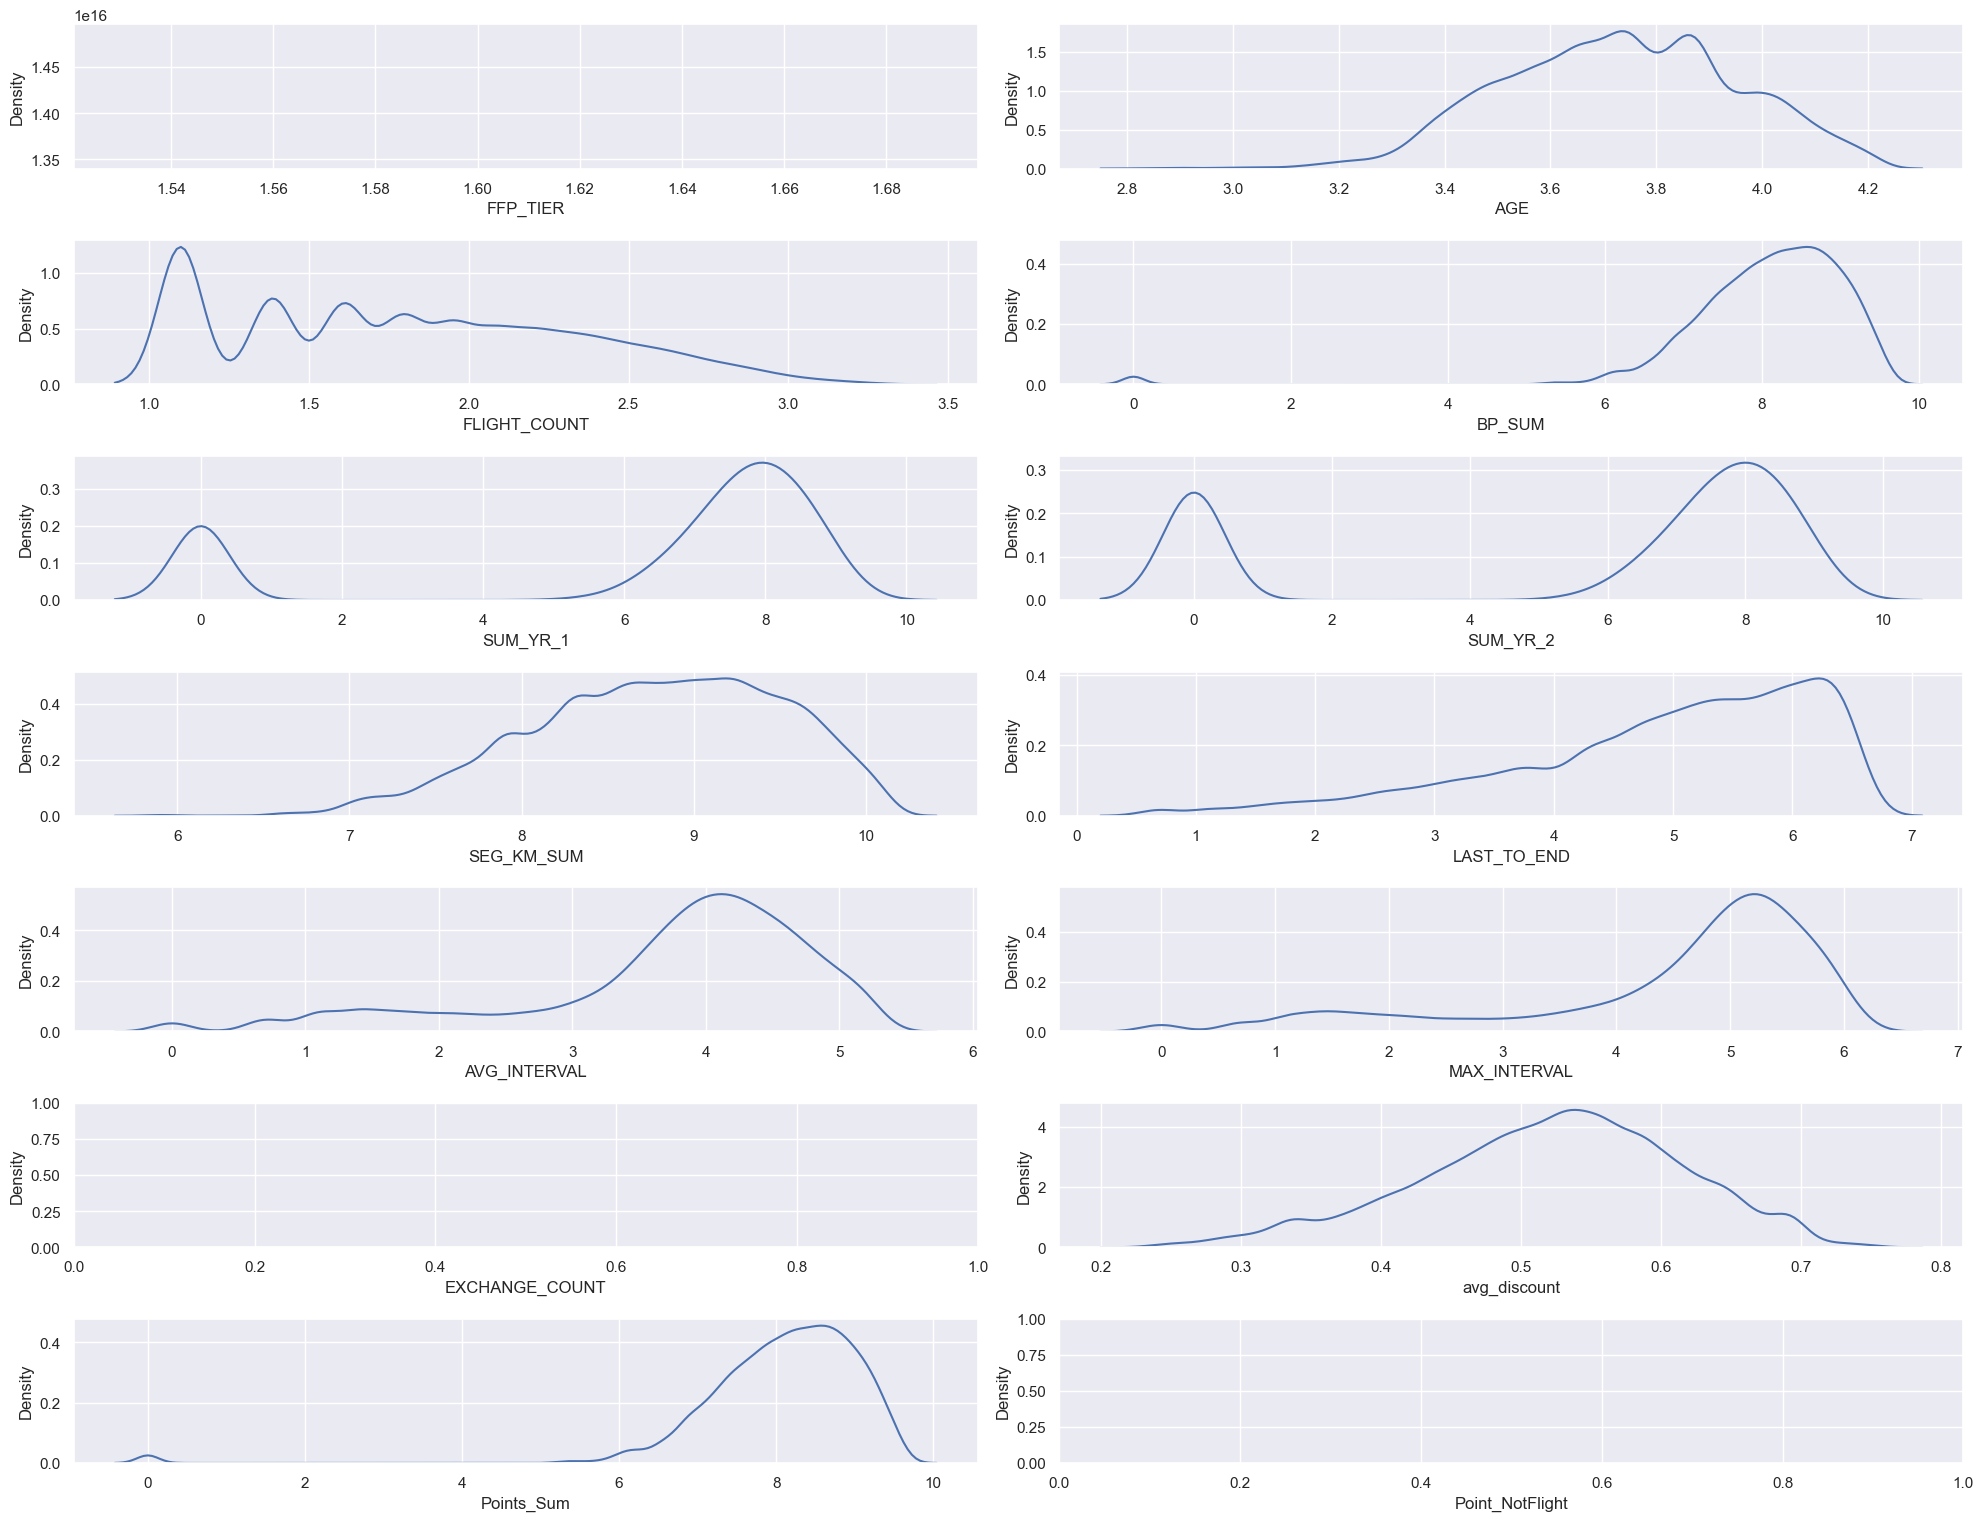

In [200]:
plt.figure(figsize=(20, 30))
for i in range(0, len(nums)):
    df_filtered[nums[i]] = np.log1p(df_filtered[nums[i]])

    plt.subplot(len(nums), 2, i+1)
    sns.kdeplot(df_filtered[nums[i]])
    plt.tight_layout()

### Bagian A

In [201]:
df_selected = df_filtered[['AGE', 'FLIGHT_COUNT', 'recency', 'monetary', 'AVG_DISTANCE']]
df_selected

AGE  FLIGHT_COUNT  recency  monetary  AVG_DISTANCE
11738  3.663562      2.639057       26   17722.0   1928.846154
11817  4.077537      1.609438      487    7900.0   5930.750000
12003  3.784190      2.639057       85   15875.0   1732.461538
12164  3.555348      2.708050      104   15930.0   1770.357143
12169  3.663562      2.890372       67   16742.0   1359.764706
...         ...           ...      ...       ...           ...
62964  3.713572      1.098612      414     830.0    184.000000
62965  3.555348      1.098612      416     830.0    184.000000
62966  3.637586      1.098612      410     830.0    184.000000
62975  3.663562      1.098612      119     910.0    184.000000
62978  3.891820      1.098612      280     370.0    380.000000

[30640 rows x 5 columns]

## Nomor 3

In [202]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

### Bagian A

#### Elbow Method

Pertama kita akan melakukan standard scaling terlebih dahulu melakukan PCA

In [203]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected)

In [204]:
df_scaled = pd.DataFrame(scaled_data, columns=df_selected.columns)

Perhitungan inertia akan dilakukan untuk mengetahui jumlah cluster terbaik

In [205]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

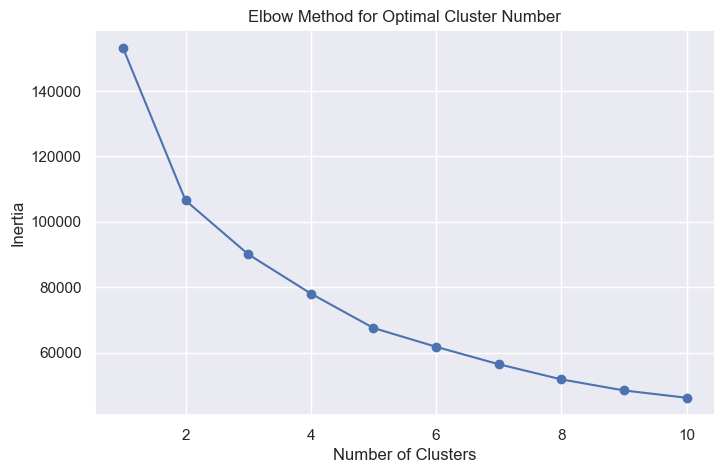

In [206]:
# Plot elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Dapat dilihat pada grafik, bahwa elbow terbentuk pada number of cluster = 2. Maka dari itu, dapat disimpulkan bahwa banyak cluster yang optimal adalah 2

#### Silhoutte Score

Pengujian Internal menggunakan Silhoutte Score juga dilakukan untuk lebih memastikan jumlah cluster yang optimal

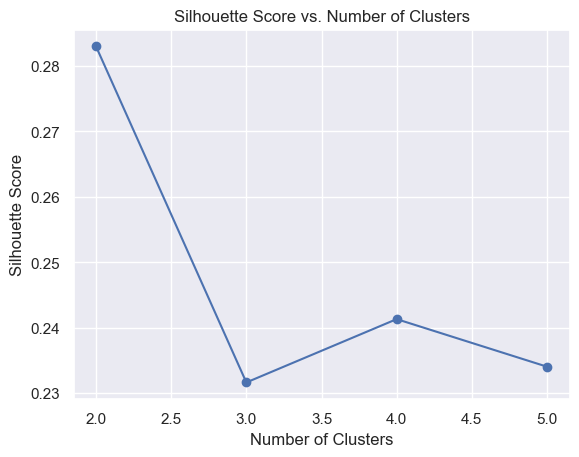

In [207]:
from sklearn.metrics import silhouette_score

cluster_range = range(2, 6)
silhouette_scores = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Dapat dilihat pada grafik, bahwa silhoutte score terbaik berada pada number of cluster = 2. Maka dari itu, dapat disimpulkan bahwa banyak cluster yang optimal adalah 2

### Bagian B

Clustering akan dilakukan menggunakn K Means dengan jumlah optimal cluster = 2 yang didapatkan dari pengujian internal

In [208]:
optimal_cluster_number = 2
kmeans = KMeans(n_clusters=optimal_cluster_number, random_state=42, n_init=10)
labels = kmeans.fit_predict(df_scaled)

In [209]:
df_scaled['Cluster_Labels'] = labels
df_scaled

AGE  FLIGHT_COUNT   recency  monetary  AVG_DISTANCE  \
0     -0.307968      1.548150 -1.047336  4.010961      0.564436   
1      1.579777     -0.354855  1.265591  0.970916      5.486383   
2      0.242100      1.548150 -0.751321  3.439289      0.322902   
3     -0.801426      1.675666 -0.655994  3.456312      0.369510   
4     -0.307968      2.012644 -0.841631  3.707638     -0.135478   
...         ...           ...       ...       ...           ...   
30635 -0.079918     -1.298994  0.899336 -1.217348     -1.581553   
30636 -0.801426     -1.298994  0.909371 -1.217348     -1.581553   
30637 -0.426417     -1.298994  0.879267 -1.217348     -1.581553   
30638 -0.307968     -1.298994 -0.580736 -1.192587     -1.581553   
30639  0.732900     -1.298994  0.227032 -1.359724     -1.340492   

       Cluster_Labels  
0                   0  
1                   1  
2                   0  
3                   0  
4                   0  
...               ...  
30635               1  
30636               1  
30637               1  
30638               1  
30639               1  

[30640 rows x 6 columns]

In [210]:
df_scaled.to_csv('../dataset/scaled.csv', index=False)

### Bagian C

#### PCA

Visualisasi akan dilakukan menggunakan PCA

In [211]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_scaled)

In [212]:
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

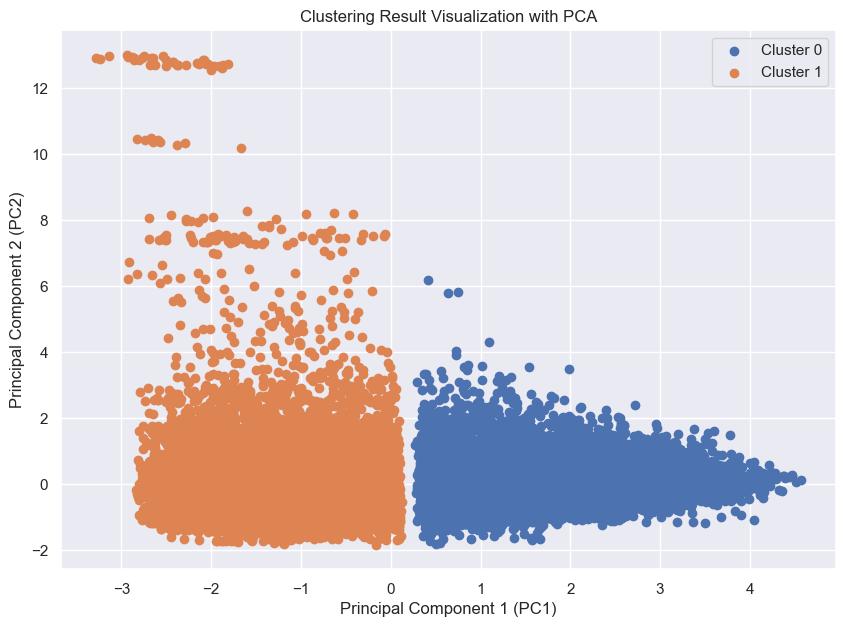

In [213]:
plt.figure(figsize=(10, 7))
for cluster in range(optimal_cluster_number):
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'],
                label=f'Cluster {cluster}')

plt.title('Clustering Result Visualization with PCA')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()

Dapat dilihat bahwa cluster sudah terpisah secara jelas

## Nomor 4

### Bagian A

In [214]:
df_result = pd.read_csv('../dataset/result.csv')
df_result

AGE  FLIGHT_COUNT  recency  monetary  AVG_DISTANCE  Cluster_Labels
0      38.0            13       26   17722.0   1928.846154               0
1      58.0             4      487    7900.0   5930.750000               1
2      43.0            13       85   15875.0   1732.461538               0
3      34.0            14      104   15930.0   1770.357143               0
4      38.0            17       67   16742.0   1359.764706               0
...     ...           ...      ...       ...           ...             ...
30635  40.0             2      414     830.0    184.000000               1
30636  34.0             2      416     830.0    184.000000               1
30637  37.0             2      410     830.0    184.000000               1
30638  38.0             2      119     910.0    184.000000               1
30639  48.0             2      280     370.0    380.000000               1

[30640 rows x 6 columns]

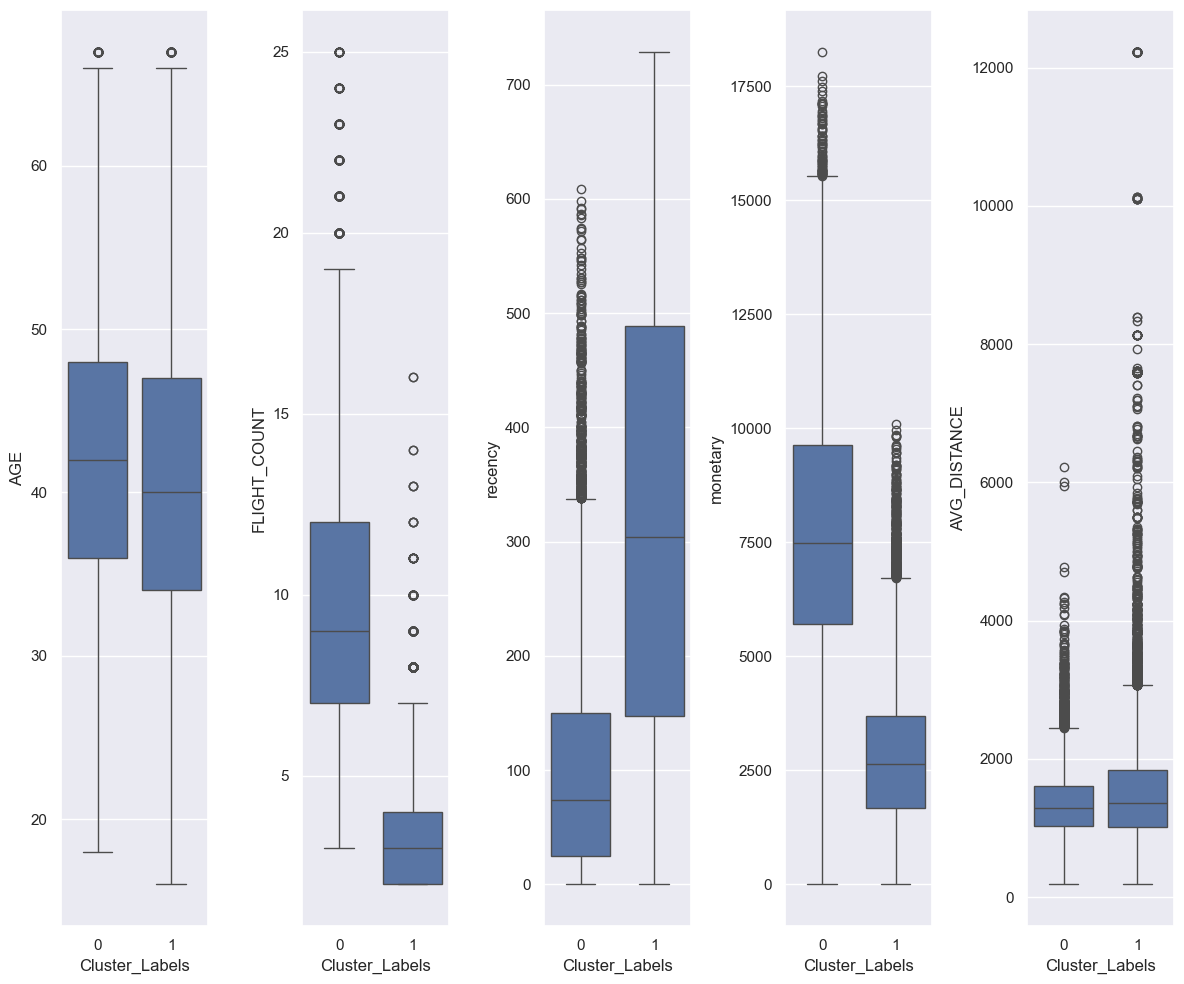

In [215]:
columns = df_result.columns
# print(columns)

plt.figure(figsize=(12, 10))
for i in range((df_result.shape[1])-1):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=df_result[columns[i]], x=df_result['Cluster_Labels'], orient='v')
    plt.tight_layout()

In [216]:
df_result.groupby('Cluster_Labels').mean()

AGE  FLIGHT_COUNT     recency     monetary  AVG_DISTANCE
Cluster_Labels                                                                
0               42.815254     10.043979  102.633199  7819.485873   1360.563768
1               41.040271      3.512908  318.551419  2824.404059   1539.282807

### Bagian B

Dari visualisasi di atas dapat disimpulkan sebagai berikut:

1. Penggemar traveling (cluster 0)

    Orang-orang pada cluster 0 ini memiliki karakteristik sebagai berikut:
    - Lebih sering melakukan penerbangan dengan rata-rata jumlah penerbangan sebanyak 10 penerbangan.
    - Terakhir kali melakukan penerbangan kurang dari 3 bulan yang lalu saat data ini diambil.
    - Tingkat spend untuk traveling cukup tinggi, dengan rata-rata sebesar USD 7,819.
    
<hr>

2. Bukan penggemar traveling (cluster 1)

    Orang-orang pada cluster 1 ini memiliki karakteristik sebagai berikut:
    - Lebih jarang melakukan penerbangan dengan rata-rata jumlah penerbangan sebanyak 3 penerbangan.
    - Terakhir kali melakukan penerbangan lebih dari 10 bulan yang lalu saat data ini diambil.
    - Tingkat spend untuk traveling rendah, dengan rata-rata sebesar USD 2,824.



### Bagian C

Rekomendasi bisnis yang dapat diberikan sebagai berikut:
1. Memberikan promo khusus kepada customers di cluster 1 dengan tujuan meningkatkan intensitas penerbangan yang dilakukan.
2. Memberikan kartu VIP kepada customers di cluster 0 dengan tujuan memberikan eksklusivitas agar mereka tetap mempertahankan loyalitas kepada perusahaan.